<a href="https://colab.research.google.com/github/Mohamed1-2/Sentiment-Analysis-on-womens-clothing-reviews/blob/main/womens_ecommerce_clothing_reviews_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***The aim of the project is to predict the sentiment of given women's clothing reviews in Review Text column , And predict if the review is positive or negative.*** 

## **import libraries** 

In [105]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import string
import nltk
import nltk.corpus
import sklearn

from matplotlib import rcParams
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords 
from nltk import NaiveBayesClassifier
from nltk.corpus import wordnet 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier 
from nltk.classify.scikitlearn import SklearnClassifier

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

!pip install -q gwpy



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
     |████████████████████████████████| 1.4 MB 5.3 MB/s 
     |████████████████████████████████| 51 kB 6.0 MB/s 
     |████████████████████████████████| 11.2 MB 30.4 MB/s 
     |████████████████████████████████| 55 kB 3.0 MB/s 
     |████████████████████████████████| 3.6 MB 14.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albume

# **Get the data**
The dataset we are working with is about `womens-ecommerce-clothing-reviews` dataset from Kaggle .

In [25]:
%%capture kaggle Key
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohamedaldofani","key":"75a153e58ac15a37df96d25901f4f107"}'}

In [26]:
pip install -q kaggle 

In [27]:
# Install Kaggle API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [28]:

# To avoid Warning 
!chmod 600 ~/.kaggle/kaggle.json 

In [29]:
# Create New Directory 
!mkdir womens-ecommerce-clothing-reviews
%cd womens-ecommerce-clothing-reviews

/content/womens-ecommerce-clothing-reviews/womens-ecommerce-clothing-reviews


In [30]:
# Searching for require dataset 
!kaggle datasets list -s nicapotato

ref                                                   title                                          size  lastUpdated          downloadCount  
----------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  
nicapotato/womens-ecommerce-clothing-reviews          Women's E-Commerce Clothing Reviews             3MB  2018-02-03 19:59:19          41468  
nicapotato/bad-bad-words                              Bad Bad Words                                   7KB  2018-02-21 21:31:20           2476  
nicapotato/pollution-in-atchison-village-richmond-ca  Pollution in Atchison Village, Richmond CA    254KB  2018-03-13 22:07:35            791  
timoboz/womens-ecommerce-clothing-reviews             Women's E-Commerce Clothing Reviews - German    6MB  2020-10-01 01:13:48            144  


In [31]:
! kaggle datasets download nicapotato/womens-ecommerce-clothing-reviews  

  0% 0.00/2.79M [00:00<?, ?B/s]
100% 2.79M/2.79M [00:00<00:00, 44.2MB/s]


In [32]:
# unzip the download file 
import zipfile
zip_ref= zipfile.ZipFile("/content/womens-ecommerce-clothing-reviews/womens-ecommerce-clothing-reviews.zip")
zip_ref.extractall()
zip_ref.close()

In [33]:
#load the data 
df = pd.read_csv("/content/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv")

In [34]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [35]:
# How many columns are there 
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [36]:
# check the shape of the dataset
df.shape

(23486, 11)

In [37]:
# Count the number of nulls in each column
df.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [38]:
# Count the number of unique values in each column
df.nunique()

Unnamed: 0                 23486
Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

In [39]:
# drop all non values
df.dropna(inplace=True)


In [40]:
# Checking for the missing values after the drops
df.isnull().sum()


Unnamed: 0                 0
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [41]:
# reseat the index after droping some rows 
df.reset_index(drop=True, inplace=True)
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [42]:
# drop unnecessary culomns 
df.drop(["Unnamed: 0", "Title", 'Clothing ID'], axis=1, inplace=True)

`In the given dataset we need to use two coulmns to generate text . the "Review Text" to get the text and "Recommended IND" to classify the review either positive or negative`

In [43]:
# to remove spaces in columns and replace them with underscore 
df.columns= df.columns.str.replace(" ", "_")

In [44]:
# Create reviews Tuples  to store the words along the categorys  
reviews = []
# go through Recommended IND column and get the category and the index 
for (index , category) in enumerate(df.Recommended_IND):
    reviews.append((df.Review_Text[index],category)) # Store the review for spacific index with catogory inside texts array
# Print first 4
reviews[0:4]

[('I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
  0),
 ("I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",
  1),
 ('This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!',
  1),
 ('I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress 

In [45]:
# shuffle the data 
import random
random.shuffle(reviews)
reviews[0:4]

[('I so wanted this blouse to work. the lacework is beautiful, and it is a substantial and well made top. the neck fits well, which is not a given for this style top, and i really like the 3/4 length sleeves. but the top billows out like a tent on me in all directions, and it was an awkward length on me (not quite hip length, not quite tunic). wish this were cut a little straighter and longer. i\'m 5\'4", 120 lbs and tried a size s.',
  1),
 ('The fabric is a nice weight jersey. i prefer to wear the dress backwards as the back of the dress has a moderate v and the round neck (which is actually the front of the dress) makes for a very flattering back. the skirt part of the dress is full but the jersey fabric falls in such a way that does not cause the silhouette to look "hippy". this is not a dress that fits close to the body through the torso, so if you\'re looking for that you might consider going down a size.',
  1),
 ('I love these jeans so much i have 4 pairs. i bought pink and gra

## **STOPWORDS**
`We need to clean each sentences by removing the stopwords `

In [46]:
# create lemmatizer 
lemmatizer = WordNetLemmatizer()

In [48]:
# Create a list of stopwords 
stops = set(stopwords.words("english"))
stops= stopwords.words("english")
punctuations=list(string.punctuation)
stops=stops+punctuations
stops, string.punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


(['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into',
  'through',
  'during',
  'before',
  'after',
  'above',
  'below',
  'to',
  'from',
  'up',
  'down',
  'in',
  'out',
  'on',
  'off',
  'over',
  'under',
  'again',
  'further',
  'th

In [49]:
# business stopwords
business_stopwords= ["i'm","would", "look", "ordered", "wear", "fit", "one", "fits","bought", "looks", "also", "got", "think", "even",
                     "tried", "get", "could", "made","way","still", "runs","true" ,"right", "see","online","wearing", "however", "design","purchased","feel","go",
                     "enough","model","though","price","looked","person","better","first","going","try", "body" "bottom","time","many","looking","around","thought",
                     "make","wanted","saw","makes","went","find","found","buy","nan","i've", "since","seems","ok", "girl", "woman"]
stops= stops+business_stopwords
stops


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [51]:
# stopwords after updated with business_stopwords
len(stops)

273

**Part-of-Speech Tagging**

In [52]:
# function to get the simpler virsion of pos tag  to use it in lemmitazation 
def get_simple_pos(tag):
    if tag.startswith('N') or tag.startswith('J'):
        return wordnet.NOUN
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN #default case

**Lemmatization**

In [57]:
# function to return Limmitzed words and cleaned from stop words  
def clean_review(words):
  output_words= []
  words_tokens= nltk.word_tokenize(words)  
  for word in words_tokens :

    if word.lower() not in stops:
      pos = pos_tag([word]) # get the part of speech of each word 
    
      clean_word=(lemmatizer.lemmatize(word.lower(), pos=get_simple_pos(tag)) for word, tag in pos)
      output_words.append(', '.join(map(str,clean_word )))
  return output_words

In [62]:
#Test our function 
clean_review("My cats are running away from my arms")

['cat', 'run', 'away', 'arm']

In [68]:
# clean all reviews 
cleaned_reviews= [(clean_review(text),category )for text,category  in reviews]

In [69]:
len(cleaned_reviews)

19662

In [70]:
#check first 5 reviews 
cleaned_reviews[0:5]

[(['blouse',
   'work',
   'lacework',
   'beautiful',
   'substantial',
   'well',
   'top',
   'neck',
   'well',
   'give',
   'style',
   'top',
   'really',
   'like',
   '3/4',
   'length',
   'sleeve',
   'top',
   'billow',
   'like',
   'tent',
   'direction',
   'awkward',
   'length',
   'quite',
   'hip',
   'length',
   'quite',
   'tunic',
   'wish',
   'cut',
   'little',
   'straighter',
   'longer',
   "'m",
   "5'4",
   "''",
   '120',
   'lb',
   'size'],
  1),
 (['fabric',
   'nice',
   'weight',
   'jersey',
   'prefer',
   'dress',
   'backwards',
   'back',
   'dress',
   'moderate',
   'v',
   'round',
   'neck',
   'actually',
   'front',
   'dress',
   'flatter',
   'back',
   'skirt',
   'part',
   'dress',
   'full',
   'jersey',
   'fabric',
   'fall',
   'cause',
   'silhouette',
   '``',
   'hippy',
   "''",
   'dress',
   'close',
   'body',
   'torso',
   "'re",
   'might',
   'consider',
   'size'],
  1),
 (['love',
   'jean',
   'much',
   '4',
   'pa

**Split the data**

*   75% for traning

*   25% for testing




In [89]:
#.75% traning = 14746 and 25% testing = 19662-14746 =4916 
traning_words=cleaned_reviews[0:14746]
testing_words=cleaned_reviews[14746:]

In [90]:
print(f"Training Data = {len(traning_words)}")
print(f"Testing Data = {len(testing_words)}")

Training Data = 14746
Testing Data = 4916


Training Data = 14746
Testing Data = 4916


In [92]:
# array contaning all words 
words_list=[]
for word in traning_words:
        words_list+=word[0] # 0 index to get only the words 


In [93]:
# Total words in traning data 
len(words_list)

392269

In [94]:
#frequency distribution for all words 
freq= nltk.FreqDist(words_list)
# The .most_common() method lists the words which occur most frequently in the data
common=freq.most_common()
# features are an array of only the top words in word list without The number of words 
features= [i[0]for i in common]

In [95]:
print(len(common))
print(len(features))

13221
13221


In [96]:
# Most common 5 words 
common[0:5]

[('dress', 8074), ('size', 7161), ('love', 6665), ("n't", 5583), ('top', 5576)]

In [97]:
# List of 5 features 
features[0:5]

['dress', 'size', 'love', "n't", 'top']

<function matplotlib.pyplot.show>

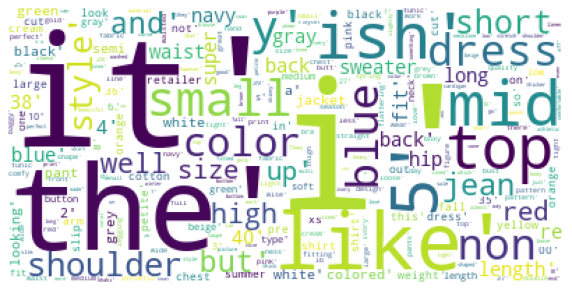

In [98]:
# Visualizing the highest repeating words (features)

# wordcload is techniqe use to show which words are the most frequent 
wordCloud = WordCloud(background_color="white", max_words =3000).generate(str(features))

rcParams["figure.figsize"]= 10,20
plt.imshow(wordCloud)
plt.axis("off")
plt.show 

In [99]:
# function to return a set of the features with true or false 
def get_dict_for_feature(words):
  current_features={}
  words_set= set(words)
  for word in features:
    current_features[word] = word in words_set  # if word comes in words set it will return True otherwise False 
  return current_features

In [100]:
featuers_dic= get_dict_for_feature(traning_words[0][0])

In [101]:
# Dictionary containing all words with True classification if the word is exist in each review otherwise false  
featuers_dic   

{'dress': False,
 'size': True,
 'love': False,
 "n't": False,
 'top': True,
 "'s": False,
 'like': True,
 'color': False,
 "'m": True,
 'great': False,
 "''": True,
 'fabric': False,
 'small': False,
 'really': True,
 'little': True,
 'perfect': False,
 'flatter': False,
 'soft': False,
 'back': False,
 'well': True,
 'nice': False,
 'bit': False,
 'comfortable': False,
 'work': True,
 'cute': False,
 'beautiful': True,
 'material': False,
 'sweater': False,
 'large': False,
 'length': True,
 'much': False,
 'shirt': False,
 '...': False,
 'petite': False,
 'jean': False,
 'long': False,
 'short': False,
 'waist': False,
 'medium': False,
 'skirt': False,
 'quality': False,
 'x': False,
 'retailer': False,
 'pretty': False,
 'usually': False,
 'store': False,
 'good': False,
 'sleeve': True,
 'pant': False,
 'style': True,
 'cut': True,
 'big': False,
 'black': False,
 'return': False,
 'say': False,
 'picture': False,
 'super': False,
 'arm': False,
 'detail': False,
 'need': False,


In [102]:
# create dic for each review wich has feature with vlue and the category
traning_words= [( get_dict_for_feature(words),category ) for words , category in traning_words]
testing_words = [( get_dict_for_feature(words),category ) for words , category in testing_words]

In [103]:
traning_words[1]

({'dress': True,
  'size': True,
  'love': False,
  "n't": False,
  'top': False,
  "'s": False,
  'like': False,
  'color': False,
  "'m": False,
  'great': False,
  "''": True,
  'fabric': True,
  'small': False,
  'really': False,
  'little': False,
  'perfect': False,
  'flatter': True,
  'soft': False,
  'back': True,
  'well': False,
  'nice': True,
  'bit': False,
  'comfortable': False,
  'work': False,
  'cute': False,
  'beautiful': False,
  'material': False,
  'sweater': False,
  'large': False,
  'length': False,
  'much': False,
  'shirt': False,
  '...': False,
  'petite': False,
  'jean': False,
  'long': False,
  'short': False,
  'waist': False,
  'medium': False,
  'skirt': True,
  'quality': False,
  'x': False,
  'retailer': False,
  'pretty': False,
  'usually': False,
  'store': False,
  'good': False,
  'sleeve': False,
  'pant': False,
  'style': False,
  'cut': False,
  'big': False,
  'black': False,
  'return': False,
  'say': False,
  'picture': False,
  's

# **NaiveBayesClassifier**


```
# create navie bayes classifier within nltk Classifier
```



In [104]:
# to the classifier we need to use NaiveBayesClassifier and pass the training words to it 
NB_classifier= NaiveBayesClassifier.train(traning_words)
print("classifier accuracy percent:",(nltk.classify.accuracy(NB_classifier, traning_words))*100)

classifier accuracy percent: 91.9096704190967


In [106]:
NB_classifier.show_most_informative_features(10)

Most Informative Features
                   awful = True                0 : 1      =     22.9 : 1.0
                  poorly = True                0 : 1      =     20.4 : 1.0
                disaster = True                0 : 1      =     19.5 : 1.0
                 bizarre = True                0 : 1      =     19.5 : 1.0
                   clown = True                0 : 1      =     19.5 : 1.0
              unwearable = True                0 : 1      =     18.6 : 1.0
                   shame = True                0 : 1      =     18.2 : 1.0
                   worst = True                0 : 1      =     17.5 : 1.0
                 weirdly = True                0 : 1      =     17.3 : 1.0
               defective = True                0 : 1      =     17.3 : 1.0


In [107]:
# we can check how the model performs on random reviews 


review_1 = "Super fast and responsive with any issues. Different style print option was great! Easy to order and a pleasure to have done business with. Looking forward to ordering more items! Thank you"
review_2= "I am thrilled with the quality & fit of the t-shirts& they were very nicely packaged too. I will definitely be re-ordering from you in the future. - Kristina - Spain"
review_3="Missing refunds. Returned parcel and got a date that I would get the refund by, five days after this date no refund. Contacted customer support and they advised I have to wait another 14 days. The service was very unhelpful and rude at times."
review_4="not the best service this time. I paid for next day delivery on Weds for items to arrive on the Thurs but no luck. Took for ever to try and find someone to speak to about this but who ever i was i did get on live chat was helpful. I left home yesterday to attend a wedding that i wanted the dress for so for it to arrive at 7pm this evening is no good at all.I look forward to your reply explaining why this happened and what can be done."
review_5="Had email saying parcel has been delivered (5 days late). However, no sign of parcel at property, with neighbour or safe place. Very disappointing as usually a good service."

reviews = [review_1,review_2,review_3,review_4,review_5]


def test_custom_review(reviews_list, classifier):
    
    for idx,review in enumerate(reviews_list) : 
        custom_tokens = clean_review(review)
        print(f"The clean review is : "  , str(custom_tokens).replace('[','').replace(']',''))
        classifiers=classifier.classify(dict([token, True] for token in custom_tokens))
        if (classifiers == 1):
            pred = "Positive"
        else:
            pred = "Negative"
        print(f"Review number {idx +1 }  seems to be {pred} \n")


In [108]:
test_custom_review(reviews,NB_classifier)


The clean review is :  'super', 'fast', 'responsive', 'issue', 'different', 'style', 'print', 'option', 'great', 'easy', 'order', 'pleasure', 'do', 'business', 'forward', 'order', 'item', 'thank'
Review number 1  seems to be Positive 

The clean review is :  'thrill', 'quality', 't-shirt', 'nicely', 'package', 'definitely', 're-ordering', 'future', 'kristina', 'spain'
Review number 2  seems to be Positive 

The clean review is :  'miss', 'refund', 'return', 'parcel', 'date', 'refund', 'five', 'day', 'date', 'refund', 'contact', 'customer', 'support', 'advise', 'wait', 'another', '14', 'day', 'service', 'unhelpful', 'rude', 'time'
Review number 3  seems to be Negative 

The clean review is :  'best', 'service', 'paid', 'next', 'day', 'delivery', 'wed', 'item', 'arrive', 'thurs', 'luck', 'took', 'ever', 'someone', 'speak', 'ever', 'live', 'chat', 'helpful', 'left', 'home', 'yesterday', 'attend', 'wedding', 'dress', 'arrive', '7pm', 'even', 'good', 'all.i', 'forward', 'reply', 'explain', 